<a href="https://colab.research.google.com/github/WojciechTyczynski/Autoencoders-for-image-quality-improvement-with-OMHU/blob/main/DL_final_Project_CAE_best_version_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
torch.manual_seed(42)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Support funtions

In [3]:
def imshow(img):
    #img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [4]:
def save_image(image, name):
  plt.imshow(np.transpose(image, (1, 2, 0)))  # convert from Tensor image
  plt.axis('off')
  plt.savefig('/content/drive/MyDrive/deep_learning/3_72_48_12/{}.jpg'.format(name))

In [5]:
# FOR NOISE AND BRIGHTNESS
def show_image(batch, imagenumber, factor_noise, factor_brightness):

  dataiter = iter(testloader)
  dataiter_noise = iter(testloader_noise)

  for times in range(batch):
    images, labels = dataiter.next()
    images_noise, _ = dataiter_noise.next()

  transformed_images = images + factor_noise * torch.randn(*images.shape) + factor_brightness * torch.ones(*images.shape)
  images_noise = np.clip(transformed_images, 0., 1.)

  # OUTPUT
  images_noise=images_noise.to(device)
  images_noise = images_noise.to(device)
  output = model(images_noise, False)

  # create figure
  fig = plt.figure(figsize=(20, 14))

  # setting values to rows and column variables
  rows = 3
  columns = 1

  # reading images
  Image1 = images[imagenumber]
  Image2 = (transformed_images)[imagenumber]
  Image3 = output[imagenumber].detach().cpu()

  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)

  # showing image
  plt.imshow(np.transpose(Image1, (1, 2, 0)))
  plt.axis('off')
  plt.title("Normal")

  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)

  # showing image
  plt.imshow(np.transpose(Image2, (1, 2, 0)))
  plt.axis('off')
  plt.title("Noisy")

  # Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)

  # showing image
  plt.imshow(np.transpose(Image3, (1, 2, 0)))
  plt.axis('off')
  plt.title("Model Output")

# Dataset - CIFAR10

In [ ]:
transform = transforms.Compose(
        [transforms.ToTensor()])

# Load dataset normal
batch_size = 20

trainset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/deep_learning', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/deep_learning', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

used_categories = range(len(classes))

train_data_iter = iter(trainloader)
test_data_iter = iter(testloader)
print('used classes:', classes)

Files already downloaded and verified
Files already downloaded and verified
used classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
transform_noise = transforms.Compose(
        [transforms.ToTensor(), 
         transforms.Lambda(lambda x : x + 0.1 * torch.randn_like(x))])

# Load dataset normal
batch_size = 20

trainset_noise = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/deep_learning', train=True,
                                        download=True, transform=transform_noise)
trainloader_noise = torch.utils.data.DataLoader(trainset_noise, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testset_noise = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/deep_learning', train=False,
                                       download=True, transform=transform_noise)
testloader_noise = torch.utils.data.DataLoader(testset_noise, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

used_categories = range(len(classes))

train_data_iter_noise = iter(trainloader_noise)
test_data_iter_noise = iter(testloader_noise)
print('used classes:', classes)

Files already downloaded and verified
Files already downloaded and verified
used classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


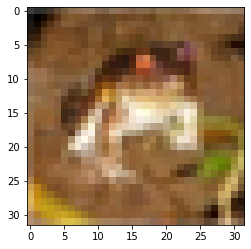

In [ ]:
images_noise, labels = train_data_iter_noise.next()
images, _ = train_data_iter.next()
imshow(images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


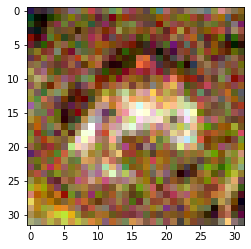

In [ ]:
imshow(images_noise[0])

In [ ]:
print("# Training data")
print("Number of points:", len(trainset))
x, y = next(iter(trainloader))
print("Batch dimension [B x C x H x W]:", x.shape)
print("Number of distinct labels:", len(set(trainset.targets)))


print("\n# Test data")
print("Number of points:", len(testset))
x, y = next(iter(testloader))
print("Batch dimension [B x C x H x W]:", x.shape)
print("Number of distinct labels:", len(set(testset.targets)))

# Training data
Number of points: 50000
Batch dimension [B x C x H x W]: torch.Size([20, 3, 32, 32])
Number of distinct labels: 10

# Test data
Number of points: 10000
Batch dimension [B x C x H x W]: torch.Size([20, 3, 32, 32])
Number of distinct labels: 10


#Dataset - STL10

In [6]:
transform = transforms.Compose(
        [transforms.ToTensor()])

# Load dataset normal
batch_size = 20

trainset = torchvision.datasets.STL10(root='/content/drive/MyDrive/deep_learning', split='train', download=True,transform=transform)
testset = torchvision.datasets.STL10(root='/content/drive/MyDrive/deep_learning', split='test',download=True, transform=transform)

# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# trainset, testset = torch.utils.data.random_split(dataset, [train_size, test_size])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



train_data_iter = iter(trainloader)
test_data_iter = iter(testloader)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
import random
transform_noise = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Lambda(lambda x : x + 0.1 * torch.randn_like(x) + (random.randint(-2,2)/20) * torch.ones_like(x))])

# Load dataset normal
batch_size = 20

trainset_noise = torchvision.datasets.STL10(root='/content/drive/MyDrive/deep_learning', split='train', download=True,transform=transform_noise)
testset_noise = torchvision.datasets.STL10(root='/content/drive/MyDrive/deep_learning', split='test',download=True, transform=transform_noise)

# train_size = int(0.8 * len(dataset_noise))
# test_size = len(dataset_noise) - train_size
# trainset_noise, testset_noise = torch.utils.data.random_split(dataset_noise, [train_size, test_size])

trainloader_noise = torch.utils.data.DataLoader(trainset_noise, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testloader_noise = torch.utils.data.DataLoader(testset_noise, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



train_data_iter_noise = iter(trainloader_noise)
test_data_iter_noise = iter(testloader_noise)

Files already downloaded and verified
Files already downloaded and verified


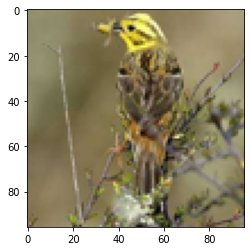

In [8]:
images_noise, labels = train_data_iter_noise.next()
images, _ = train_data_iter.next()
imshow(images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


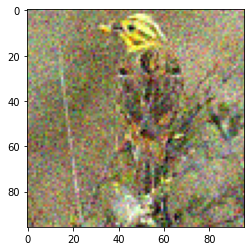

In [9]:
imshow(images_noise[0])

In [10]:
print("# Training data")
print("Number of points:", len(trainset))
x, y = next(iter(trainloader))
print("Batch dimension [B x C x H x W]:", x.shape)



print("\n# Test data")
print("Number of points:", len(testset))
x, y = next(iter(testloader))
print("Batch dimension [B x C x H x W]:", x.shape)

# Training data
Number of points: 5000
Batch dimension [B x C x H x W]: torch.Size([20, 3, 96, 96])

# Test data
Number of points: 8000
Batch dimension [B x C x H x W]: torch.Size([20, 3, 96, 96])


# Network


In [11]:
class ConvAutoencoder(nn.Module):
  def __init__(self):
      super(ConvAutoencoder, self).__init__()

      #Encoder
      self.conv1 = nn.Conv2d(3, 72, 4, padding=1)
      self.conv2 = nn.Conv2d(72, 48, 4, padding=1)
      self.conv3 = nn.Conv2d(48, 12, 4, padding=1)
      self.conv4 = nn.Conv2d(12, 3, 4, padding=1)
      self.pool = nn.MaxPool2d(2, 2)
      self.upsample = nn.Upsample(2)

      #Decoder
      self.t_conv1 = nn.ConvTranspose2d(3, 12, 4, padding=1)
      self.t_conv2 = nn.ConvTranspose2d(12, 48, 4, padding=1)
      self.t_conv3 = nn.ConvTranspose2d(48, 72, 4, padding=1)
      self.t_conv4 = nn.ConvTranspose2d(72, 3, 4, padding=1)
     

  def forward(self, x, boolean):
      x = F.relu(self.conv1(x))
      #print('1{}'.format(x.size()))
      x = F.relu(self.conv2(x))
      #print('2{}'.format(x.size()))
      x = F.relu(self.conv3(x))
      #print('3{}'.format(x.size()))
      x = F.relu(self.conv4(x))
      if boolean == True:
        save_image(F.sigmoid(x[1]).detach().cpu(), 'Latent')
      #print('latent{}'.format(x.size()))
      x = F.relu(self.t_conv1(x))
      #print('1-{}'.format(x.size()))
      x = F.relu(self.t_conv2(x))
      #print('2-{}'.format(x.size()))
      x = F.relu(self.t_conv3(x))
      #print('3-{}'.format(x.size()))
      x = F.sigmoid(self.t_conv4(x))
      #print('Out{}'.format(x.size()))

      return x
  
#Instantiate the model
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(3, 72, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(72, 48, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(48, 12, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(12, 3, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upsample): Upsample(size=2, mode=nearest)
  (t_conv1): ConvTranspose2d(3, 12, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (t_conv2): ConvTranspose2d(12, 48, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (t_conv3): ConvTranspose2d(48, 72, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (t_conv4): ConvTranspose2d(72, 3, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
)


In [12]:
model = ConvAutoencoder()
model.load_state_dict(torch.load('/content/drive/MyDrive/deep_learning/final.pth', map_location=torch.device('cpu')))
model.eval()

ConvAutoencoder(
  (conv1): Conv2d(3, 72, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(72, 48, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(48, 12, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(12, 3, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upsample): Upsample(size=2, mode=nearest)
  (t_conv1): ConvTranspose2d(3, 12, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (t_conv2): ConvTranspose2d(12, 48, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (t_conv3): ConvTranspose2d(48, 72, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (t_conv4): ConvTranspose2d(72, 3, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
)

In [12]:
#Loss function
criterion = nn.MSELoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)
model.to(device)

cuda:0


ConvAutoencoder(
  (conv1): Conv2d(3, 72, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(72, 48, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(48, 12, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(12, 3, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upsample): Upsample(size=2, mode=nearest)
  (t_conv1): ConvTranspose2d(3, 12, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (t_conv2): ConvTranspose2d(12, 48, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (t_conv3): ConvTranspose2d(48, 72, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (t_conv4): ConvTranspose2d(72, 3, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 	Training Loss: 0.449158.  Test Loss: 0.273924
Epoch: 2 	Training Loss: 0.268217.  Test Loss: 0.234790
Epoch: 3 	Training Loss: 0.191406.  Test Loss: 0.198241
Epoch: 4 	Training Loss: 0.164393.  Test Loss: 0.158276
Epoch: 5 	Training Loss: 0.164312.  Test Loss: 0.150126
Epoch: 6 	Training Loss: 0.152089.  Test Loss: 0.141281
Epoch: 7 	Training Loss: 0.142092.  Test Loss: 0.136848
Epoch: 8 	Training Loss: 0.146608.  Test Loss: 0.147109
Epoch: 9 	Training Loss: 0.141687.  Test Loss: 0.132714
Epoch: 10 	Training Loss: 0.145501.  Test Loss: 0.147233
Epoch: 11 	Training Loss: 0.143391.  Test Loss: 0.149351
Epoch: 12 	Training Loss: 0.140011.  Test Loss: 0.130261
Epoch: 13 	Training Loss: 0.135364.  Test Loss: 0.134549
Epoch: 14 	Training Loss: 0.140040.  Test Loss: 0.142960
Epoch: 15 	Training Loss: 0.133765.  Test Loss: 0.131124
Epoch: 16 	Training Loss: 0.127430.  Test Loss: 0.122940
Epoch: 17 	Training Loss: 0.130760.  Test Loss: 0.127212
Epoch: 18 	Training Loss: 0.130925.  Tes

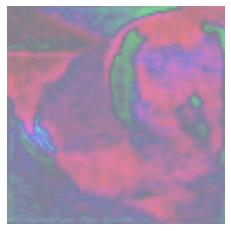

In [14]:
#Epochs
n_epochs = 100
epoch_train_loss = []
epoch_test_loss = []
epoch_train_improvement = []
epoch_test_improvement = []



for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    test_loss = 0.0
    train_improvement = 0
    test_improvement = 0
    added_noise_train = 0
    added_noise_test = 0

    #Training
    for (data, data_noise) in zip(trainloader, trainloader_noise):
        images, _ = data
        noisy_imgs, _ = data_noise
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        noisy_imgs=noisy_imgs.to(device)
        images = images.to(device)

        optimizer.zero_grad()
        outputs = model(noisy_imgs, False)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*images.size(0)
        train_improvement += criterion(outputs,noisy_imgs).item()*images.size(0)
        added_noise_train += criterion(images,noisy_imgs).item()*images.size(0)
  
    epoch_train_loss.append(train_loss/len(trainloader))

    with torch.no_grad():

        for (data,data_noisey,turn) in zip(testloader, testloader_noise, range(len(testloader))):

            test_images, _ = data
            noisy_test_images, _ = data_noisey
            noisy_test_images = np.clip(noisy_test_images, 0., 1.)
            noisy_test_images=noisy_test_images.to(device)
            test_images = test_images.to(device)

            if turn==3:
              # save the image before model, on purpose always with the same name so we have it to compare
              if epoch == 100:
                output_test = model(noisy_test_images, True)
              else:
                output_test = model(noisy_test_images, False)
                save_image(test_images[1].cpu(), 'base')
                save_image(noisy_test_images[1].cpu(), 'noisy')
                # save the image run through the model
                save_image(output_test[1].cpu(), epoch)
            else: 
              output_test = model(noisy_test_images, False)

            # gather data for the validation step
            test_loss += (criterion(output_test, test_images).item()*test_images.size(0))
            test_improvement += criterion(output_test,noisy_test_images).item()*test_images.size(0)
            added_noise_test += criterion(test_images,noisy_test_images).item()*test_images.size(0)
        

    train_loss = train_loss/len(trainloader)
    test_loss = test_loss/len(testloader)

    epoch_test_loss.append(test_loss)

    percentage_improvement_train = ((added_noise_train-train_improvement)/added_noise_train)*100
    percentage_improvement_test = ((added_noise_test-test_improvement)/added_noise_test)*100

    epoch_test_improvement.append(percentage_improvement_test)
    epoch_train_improvement.append(percentage_improvement_train)


    print('Epoch: {} \tTraining Loss: {:.6f}.  Test Loss: {:.6f}'.format(epoch, train_loss, test_loss))


import pandas as pd
errors = {'train' : epoch_train_loss, 'test' : epoch_test_loss}
df_errors = pd.DataFrame(data = errors)
df_errors.to_csv('/content/drive/MyDrive/deep_learning/final.csv')

torch.save(model.state_dict(), '/content/drive/MyDrive/deep_learning/final.pth')


In [15]:

import pandas as pd
errors = {'train' : epoch_train_loss, 'test' : epoch_test_loss}
df_errors = pd.DataFrame(data = errors)
df_errors.to_csv('/content/drive/MyDrive/deep_learning/stl_no_pool.csv')

torch.save(model.state_dict(), '/content/drive/MyDrive/deep_learning/stl_no_pool.pth')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


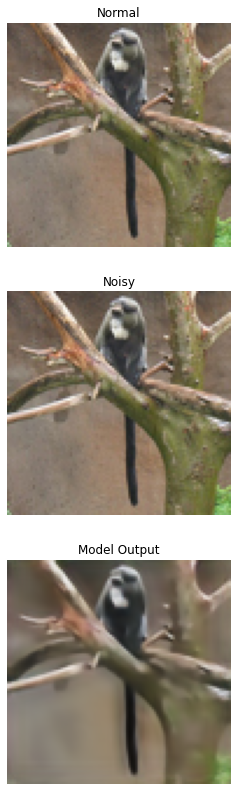

In [16]:
show_image(1, 1, 0, 0)

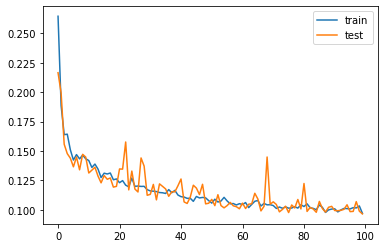

<Figure size 432x288 with 0 Axes>

In [ ]:
errors = pd.read_csv('/content/drive/MyDrive/deep_learning/final.csv', index_col = [0])

plt.plot(errors.index.values.tolist(), errors['train'], label = 'train')
plt.plot(errors.index.values.tolist(), errors['test'], label = 'test')
plt.legend()
plt.show()

plt.savefig('errors_plot.jpg')


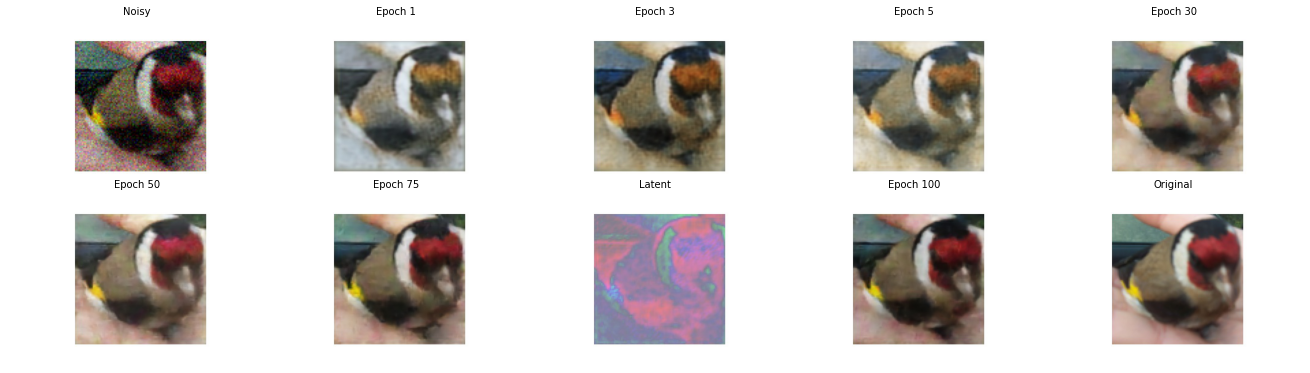

In [ ]:
import cv2
Noisy = plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/noisy.jpg')
Image1 = plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/1.jpg')
Image2 =  plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/3.jpg')
Image3 =  plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/5.jpg')
Image4 =  plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/30.jpg')
Image5 =  plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/50.jpg')
Image6 =  plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/75.jpg')
Image7 =  plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/Latent.jpg')
Image8 =  plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/99.jpg')
base =  plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/base.jpg')
imgs = [Noisy, Image1, Image2,Image3,Image4, Image5,Image6,Image7,Image8, base]

epoch = ["Noisy","Epoch 1","Epoch 3","Epoch 5","Epoch 30","Epoch 50","Epoch 75","Latent","Epoch 100", "Original"]

aspect = Image1.shape[0]/float(Image1.shape[1])
n = 2 # number of rows
m = 5 # numberof columns
bottom = 0.1; left=0.05
top=1.-bottom; right = 1.-left
fisasp = (1-bottom-(1-top))/float( 1-left-(1-right) )
#widthspace, relative to subplot size
wspace=0.0  # set to zero for no spacing
hspace=wspace/float(aspect)
#fix the figure height
figheight= 6 # inch
figwidth = (m + (m-1)*wspace)/float((n+(n-1)*hspace)*aspect)*figheight*fisasp 

fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(figwidth, figheight))
plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right, 
                    wspace=wspace, hspace=hspace)

for ax, image, title in zip(axes.flatten(), imgs, epoch):
    ax.imshow(image)
    ax.set_title(title,fontsize=10)
    ax.axis('off')
plt.savefig('Progression.jpg')
plt.show()

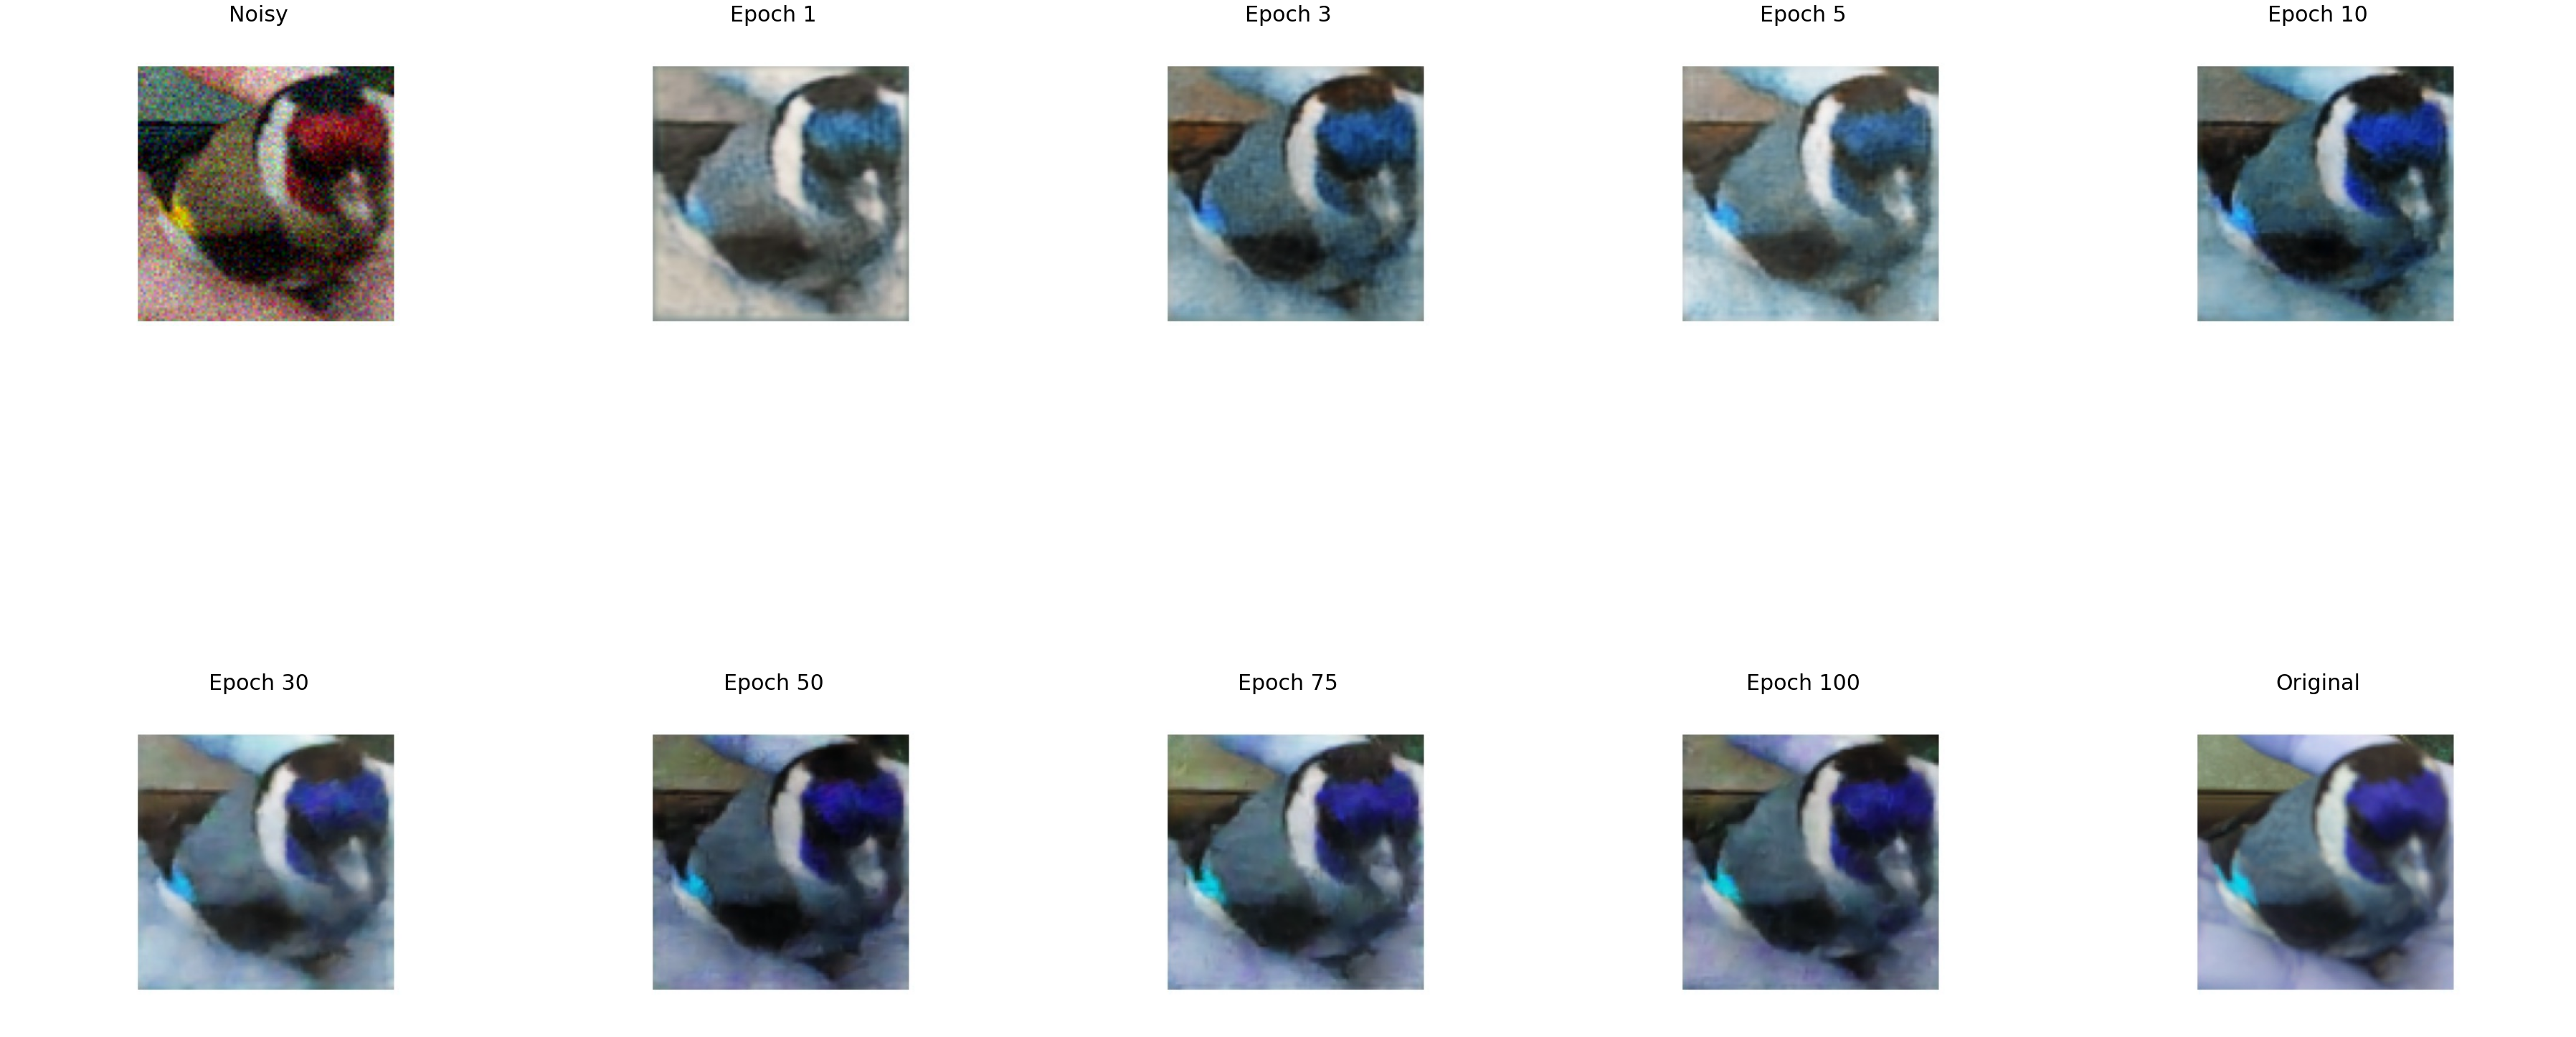

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2,5,figsize=(50,50)) 
import cv2


# reading images
Noisy = plt.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/noisy.jpg')
Image1 = cv2.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/1.jpg')
Image2 =  cv2.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/3.jpg')
Image3 =  cv2.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/5.jpg')
Image4 =  cv2.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/10.jpg')
Image5 =  cv2.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/30.jpg')
Image6 =  cv2.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/48.jpg')
Image7 =  cv2.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/75.jpg')
Image8 =  cv2.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/99.jpg')
base =  cv2.imread('/content/drive/MyDrive/deep_learning/3_72_48_12/base.jpg')

images = [Noisy, Image1, Image2,Image3,Image4, Image5,Image6,Image7,Image8, base]
epoch = ["Noisy","Epoch 1","Epoch 3","Epoch 5","Epoch 10","Epoch 30","Epoch 50","Epoch 75","Epoch 100", "Original"]
locations = [(0,0),(0,1),(0,2),(0,3),(0,4),(1,0),(1,1),(1,2),(1,3),(1,4)]
for (i, image, number) in zip(locations, images, epoch):
  axarr[i].imshow(image)
  axarr[i].set_title(number, fontsize = 30)
  axarr[i].axis('off')
  plt.tight_layout()
  '''
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i, autoscale_on = True)

  # showing image
  plt.imshow(image)
  plt.axis('off')
  plt.title(number, fontsize = 30)
  '''

  
plt.savefig('progression.jpg')

In [ ]:
showOrigNoiseOut(images.cpu(), noisy_imgs.cpu(), output.cpu())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


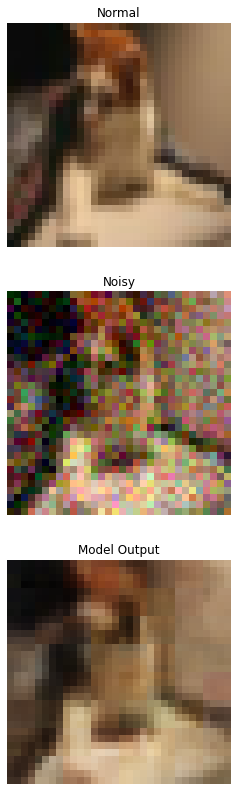

In [ ]:
show_image(4,1, 0.1)

# Gaussian noise

In [ ]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

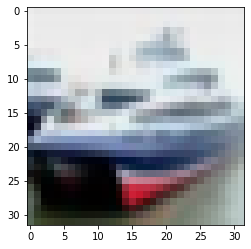

In [ ]:
# obtain one batch of training images
dataiter = iter(testloader)
images, labels = dataiter.next()
# convert images to numpy for display
imshow(images[1])

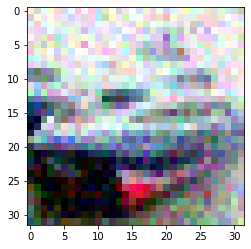

In [ ]:
dataiter_noise = iter(testloader_noise)
images_noise, _ = dataiter_noise.next()
images_noise = np.clip(images_noise, 0., 1.)
imshow(images_noise[1])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


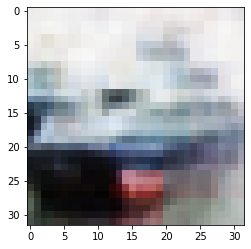

In [ ]:
images_noise=images_noise.to(device)
images_noise = images_noise.to(device)

output = model(images_noise)
imshow(output[1].detach().cpu())

In [ ]:
showOrigDec(images,noisy_imgs)

In [ ]:
def showOrigDec(orig, noise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display noisy
        ax = plt.subplot(2, n, i +1 + n)
        imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.figtext(0.5,0.95, "ORIGINAL IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.5, "NOISY IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.subplots_adjust(hspace = 0.3 )
        
    plt.show()

In [ ]:
#Epochs
n_epochs = 50

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    test_loss = 0.0

    #Training
    for data in trainloader:
        images, _ = data
        noisy_imgs = images + AddGaussianNoise(0., 0.1).__call__(images)
        noisy_imgs=noisy_imgs.to(device)
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(noisy_imgs)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
  

    with torch.no_grad():
        
        # Just load a single batch from the test loader
        test_images, _ = next(iter(testloader))
        test_images = test_images.to(device)
        
        # perform a forward pass through the model
        test_outputs = model(test_images)
        
        # gather data for the validation step
        test_loss = criterion(test_outputs, test_images).item()*test_images.size(0)
        
        
    train_loss = train_loss/len(trainloader)
    test_loss = test_loss/len(test_images)
    print('Epoch: {} \tTraining Loss: {:.6f}.  Test Loss: {:.6f}'.format(epoch, train_loss, test_loss))

if not os.path.exists('./weights'):
    os.mkdir('./weights')
torch.save(model.state_dict(), "./weights/autoencoder.pkl")

In [ ]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()

# add noise to the test images
noisy_imgs = AddGaussianNoise(0., 0.1).__call__(images)

# get sample outputs
output = model(noisy_imgs.cuda())

# output is resized into a batch of iages
output = output.view(batch_size, 3, 32, 32)
# use detach when it's an output that requires_grad
output = output.detach().cpu()

In [ ]:
showOrigNoiseOut(images.cpu(), noisy_imgs.cpu(), output.cpu())

In [ ]:
def showOrigNoiseOut(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 6))
    denoise = denoise.detach().numpy()

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noisy image
        ax = plt.subplot(3, n, i +1 + n)
        imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        imshow(denoise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.figtext(0.5,0.95, "ORIGINAL IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.65, "NOISY IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.figtext(0.5,0.35, " DENOISED RECONSTRUCTED IMAGES", ha="center", va="top", fontsize=14, color="r")
    plt.subplots_adjust(hspace = 0.5 )
    plt.show()

In [ ]:
# FOR NOISE

def show_image(batch, imagenumber, factor):

  dataiter = iter(testloader)
  dataiter_noise = iter(testloader_noise)

  for times in range(batch):
    images, labels = dataiter.next()
    images_noise, _ = dataiter_noise.next()
  
  transformed_image = images + factor * torch.randn(*images.shape)
  
  images_noise = np.clip(transformed_image, 0., 1.)

  # OUTPUT
  images_noise=images_noise.to(device)
  images_noise = images_noise.to(device)
  output = model(images_noise)

  # create figure
  fig = plt.figure(figsize=(20, 14))

  # setting values to rows and column variables
  rows = 3
  columns = 1

  # reading images
  Image1 = images[imagenumber]
  Image2 = transformed_image[imagenumber]
  Image3 = output[imagenumber].detach().cpu()

  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)

  # showing image
  plt.imshow(np.transpose(Image1, (1, 2, 0)))
  plt.axis('off')
  plt.title("Normal")

  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)

  # showing image
  plt.imshow(np.transpose(Image2, (1, 2, 0)))
  plt.axis('off')
  plt.title("Noisy")

  # Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)

  # showing image
  plt.imshow(np.transpose(Image3, (1, 2, 0)))
  plt.axis('off')
  plt.title("Model Output")